In [29]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [30]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [31]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [32]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [33]:
train_scaled.reshape

<function ndarray.reshape>

In [34]:
model = keras.Sequential()

In [35]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

C:\Users\2-10\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.add(keras.layers.MaxPooling2D(2))

In [37]:
model.add(
    keras.layers.Conv2D(
        64, kernel_size=3, activation='relu', padding='same'
        
    )

    
)

In [38]:
model.add(keras.layers.MaxPooling2D(2))

In [39]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7920 - loss: 0.5854 - val_accuracy: 0.8888 - val_loss: 0.3085
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8973 - loss: 0.2860 - val_accuracy: 0.8993 - val_loss: 0.2761
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9158 - loss: 0.2310 - val_accuracy: 0.9032 - val_loss: 0.2606
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9288 - loss: 0.1964 - val_accuracy: 0.9072 - val_loss: 0.2501
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9367 - loss: 0.1681 - val_accuracy: 0.9137 - val_loss: 0.2456
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9494 - loss: 0.1392 - val_accuracy: 0.9203 - val_loss: 0.2354
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9563 - loss: 0.1187 - val_accuracy: 0.9157 - val_loss: 0.2484
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9614 - loss: 0

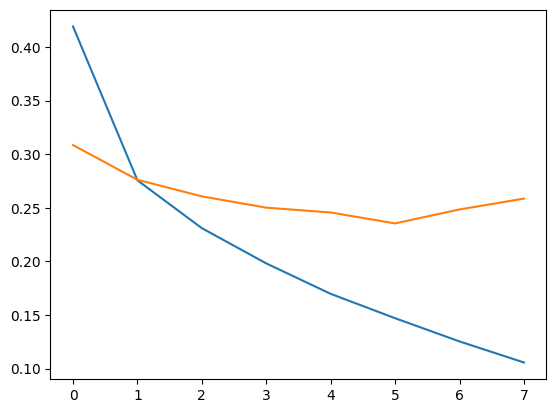

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [43]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9215 - loss: 0.2404


[0.23539552092552185, 0.9203333258628845]

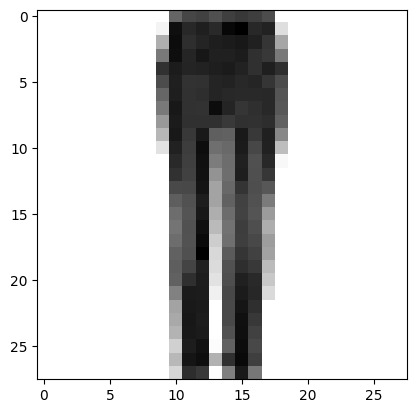

In [51]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [52]:
model.predict(val_scaled[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[4.0339864e-07, 9.9998903e-01, 1.0575175e-07, 1.6420762e-06,
        7.9688480e-06, 6.5860331e-11, 8.3644915e-07, 1.1325971e-13,
        9.8451247e-11, 1.0324729e-10],
       [1.4159066e-06, 2.9116592e-08, 1.2327306e-08, 5.9802795e-07,
        5.2422680e-09, 3.5383981e-01, 5.3656361e-08, 6.4475727e-01,
        1.0878979e-07, 1.4006520e-03],
       [2.0018772e-03, 1.7395545e-06, 1.9315082e-01, 2.5774597e-04,
        7.9125547e-01, 2.8651564e-06, 1.3078850e-02, 6.5039058e-05,
        1.6712467e-04, 1.8470433e-05],
       [3.1103957e-06, 9.9998176e-01, 1.6225668e-08, 1.4153300e-05,
        1.1076670e-07, 1.1061402e-08, 7.7111883e-07, 2.1179168e-13,
        2.8736806e-09, 4.6669069e-10],
       [4.7478517e-07, 2.2640213e-10, 5.3156683e-09, 1.2470699e-10,
        1.1239278e-09, 9.9972671e-01, 2.8563006e-08, 2.7087878e-04,
        7.2501280e-08, 1.8307734e-06]], dtype=float32)

In [53]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.64, 0.  , 0.  ],
       [0.  , 0.  , 0.19, 0.  , 0.79, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [54]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [55]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9139 - loss: 0.2623


[0.2498284876346588, 0.9154000282287598]

In [56]:
test_input.shape

(10000, 28, 28)